# Correlation Matrix Analysis

Below is an overview of the correlation matrix for the ten selected stocks. Recall that each cell represents the pairwise correlation of **daily log returns** between two stocks, taking values between \(-1\) and \(1\). A value closer to \(1\) indicates a strong positive correlation (both move similarly), while a value closer to \(-1\) indicates a strong negative correlation (they move oppositely). Values near \(0\) suggest little to no linear relationship in their daily price movements.

## 1. High Correlation Within the Financial Sector
- **JPM** (JPMorgan Chase) and **BAC** (Bank of America) show a notably high correlation of **0.8977**.
- Both are major banking stocks, influenced heavily by the same macroeconomic factors (e.g., interest rates, banking regulations, and overall market sentiment). This leads to similar daily price fluctuations.

## 2. Notable Correlation Among Tech Giants
- The technology‐driven companies **AMZN** (Amazon), **GOOGL** (Alphabet/Google), **MSFT** (Microsoft), and **AAPL** (Apple) all show moderate to high mutual correlations (in the 0.5–0.66 range):
  - **MSFT** and **GOOGL**: 0.6643
  - **MSFT** and **AAPL**: 0.5658
  - **AMZN** and **GOOGL**: 0.6571
- These correlations reflect how large technology companies often respond similarly to market sentiment, economic outlook, and investor behavior.

## 3. Consumer Staples and Energy
- **PG** (Procter & Gamble), a consumer staples stock, has **lower** correlations with some of the tech names:
  - PG and AAPL = 0.2885
  - PG and AMZN = 0.2107
- **XOM** (ExxonMobil), an energy sector representative, also shows generally lower to mid‐range correlations with tech and finance:
  - XOM and AAPL = 0.3555
  - XOM and AMZN = 0.2832
- These relatively lower correlations result from differences in what drives each sector. PG is influenced by consumer demand for household products (often considered defensive), and XOM is more tied to oil prices and energy demand.

## 4. Sector‐Specific Influences
- **Same‐sector stocks** usually share higher correlations. For instance:
  - **Financials**: JPM and BAC (0.8977)
  - **Tech**: MSFT, AAPL, AMZN, GOOGL, and even **V** (Visa) to some extent (all above 0.5)
- **Different‐sector** pairs tend to have lower correlations, aiding **portfolio diversification** if you choose those from different industries.

## 5. Cross‐Sector Observations
- Even across sectors, there are still some moderate correlations. For example:
  - JPM and XOM = 0.5184; BAC and XOM = 0.4540
- Macroeconomic factors (e.g., economic growth, geopolitical events) can simultaneously impact financials and energy. When the market is bullish, many large‐cap, blue‐chip stocks benefit in tandem.

## 6. Diversification Implications
- Stocks that move together (higher correlation) reduce the diversification benefits in a portfolio because they often rise or fall simultaneously.
- Adding stocks from sectors with **low inter‐stock correlation**—for instance, mixing consumer staples or energy with tech/finance—can help reduce overall portfolio volatility.




Correlation matrix for selected stocks:
           AAPL      AMZN     GOOGL      MSFT       JPM       JNJ         V  \
AAPL   1.000000  0.485394  0.516305  0.565830  0.425646  0.307323  0.532271   
AMZN   0.485394  1.000000  0.657100  0.613155  0.347008  0.284071  0.562469   
GOOGL  0.516305  0.657100  1.000000  0.664268  0.415427  0.362759  0.613248   
MSFT   0.565830  0.613155  0.664268  1.000000  0.492165  0.410010  0.666898   
JPM    0.425646  0.347008  0.415427  0.492165  1.000000  0.425492  0.533684   
JNJ    0.307323  0.284071  0.362759  0.410010  0.425492  1.000000  0.413755   
V      0.532271  0.562469  0.613248  0.666898  0.533684  0.413755  1.000000   
PG     0.288467  0.210650  0.279220  0.369341  0.310128  0.456123  0.349601   
BAC    0.392135  0.338072  0.391142  0.450807  0.897665  0.331792  0.507543   
XOM    0.355513  0.283239  0.335435  0.385922  0.518356  0.423832  0.400022   

             PG       BAC       XOM  
AAPL   0.288467  0.392135  0.355513  
AMZN   0.21065

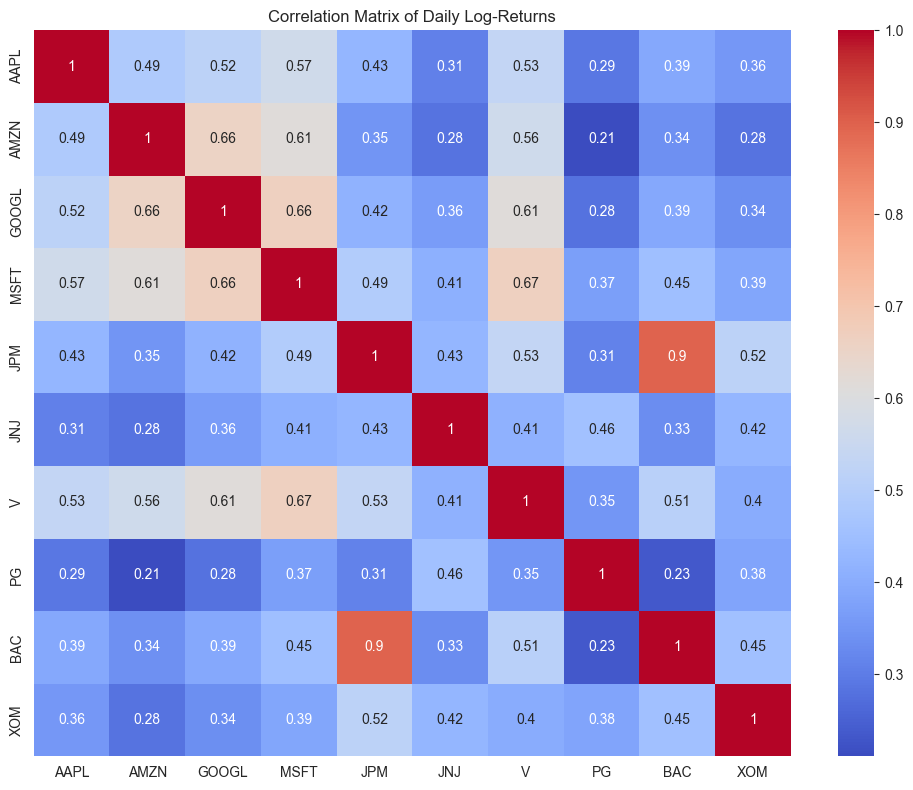

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. LOAD THE DATA
# ---------------------------
# Make sure the CSV files are in the same directory or provide the full path.
df_stocks = pd.read_csv(
    'snp_allstocks_2015_2019.csv',
    parse_dates=['Date'],
    index_col='Date'
)
df_info = pd.read_csv('snp_info.csv')

# ---------------------------
# 2. SELECT UP TO 10 STOCKS
# ---------------------------
# For example, here we select 10 large, well-known companies spread across sectors.
selected_stocks = [
    'AAPL',  # Apple
    'AMZN',  # Amazon
    'GOOGL', # Alphabet (Google)
    'MSFT',  # Microsoft
    'JPM',   # JPMorgan Chase
    'JNJ',   # Johnson & Johnson
    'V',     # Visa
    'PG',    # Procter & Gamble
    'BAC',   # Bank of America
    'XOM'    # Exxon Mobil
]

# ---------------------------
# 3. COMPUTE DAILY LOG-RETURNS
# ---------------------------
# 3A. Filter the main dataframe to the selected stocks
df_selected = df_stocks[selected_stocks].dropna(how='all')

# 3B. Compute daily log-returns: log(P_t / P_{t-1})
df_log_returns = np.log(df_selected / df_selected.shift(1))
df_log_returns.dropna(inplace=True)

# ---------------------------
# 4. CORRELATION MATRIX
# ---------------------------
corr_matrix = df_log_returns.corr()

# Print the correlation matrix to screen
print("Correlation matrix for selected stocks:")
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)
plt.title("Correlation Matrix of Daily Log-Returns")
plt.tight_layout()
plt.show()

# Analysis of Stock Correlation Network Graph

The network graph visualizes the correlation relationships between 10 selected stocks from the S&P 500 index, with edges shown only for correlations exceeding 0.5. This threshold helps identify the strongest relationships between stocks.

## Network Structure
The graph reveals distinct patterns of correlation between different stocks and sectors:

- **Technology Cluster**: A clear cluster forms among technology stocks (AAPL, MSFT, GOOGL, AMZN), showing strong interconnectedness. This suggests technology stocks tend to move together, likely reflecting similar market drivers and investor sentiment.

- **Financial Services Connection**: JPM and BAC (both financial institutions) show a direct correlation, forming their own mini-cluster. Interestingly, V (Visa) serves as a bridge between the technology and financial sectors.

- **Isolated Stocks**: JNJ (Health Care) appears completely isolated with no strong correlations to any other stock. Similarly, PG (Consumer Staples) has minimal connections, only linking to XOM (Energy). This isolation suggests these defensive stocks move independently from the broader market.

## Centrality Analysis
The centrality measures provide valuable insights into the network's structure:

- **V (Visa)** emerges as the most central stock with the highest degree centrality (0.667) and closeness centrality (0.681), connecting with 6 of the 9 other stocks. It also has the highest betweenness centrality (0.343), indicating its critical role as a bridge between different stock groups.

- **GOOGL and MSFT** tie for second place in degree centrality (0.444), both well-connected within the technology sector and to Visa.

- **JPM** shows moderate centrality measures but has significant betweenness centrality (0.167), suggesting it serves as an important connector between different parts of the network.

## Sector Relationships
The color-coding by sector reveals interesting cross-sector relationships:

- Information Technology (blue) and Consumer Discretionary (orange) sectors show strong internal correlation and cross-sector connections
- Financial stocks (pink) form their own cluster but connect to the broader network through Visa
- Consumer Staples (green), Energy (red), and Health Care (purple) show minimal integration with the broader network

## Investment Implications
This network structure provides valuable insights for portfolio diversification and risk management:

1. Adding isolated stocks like JNJ to a technology-heavy portfolio could provide effective diversification
2. Visa's central position suggests it may be more susceptible to market-wide movements
3. The technology cluster's tight interconnectedness indicates that diversifying within this sector alone may not effectively reduce portfolio risk

The network's structure illustrates why sector-based diversification is important for risk management in investment portfolios.

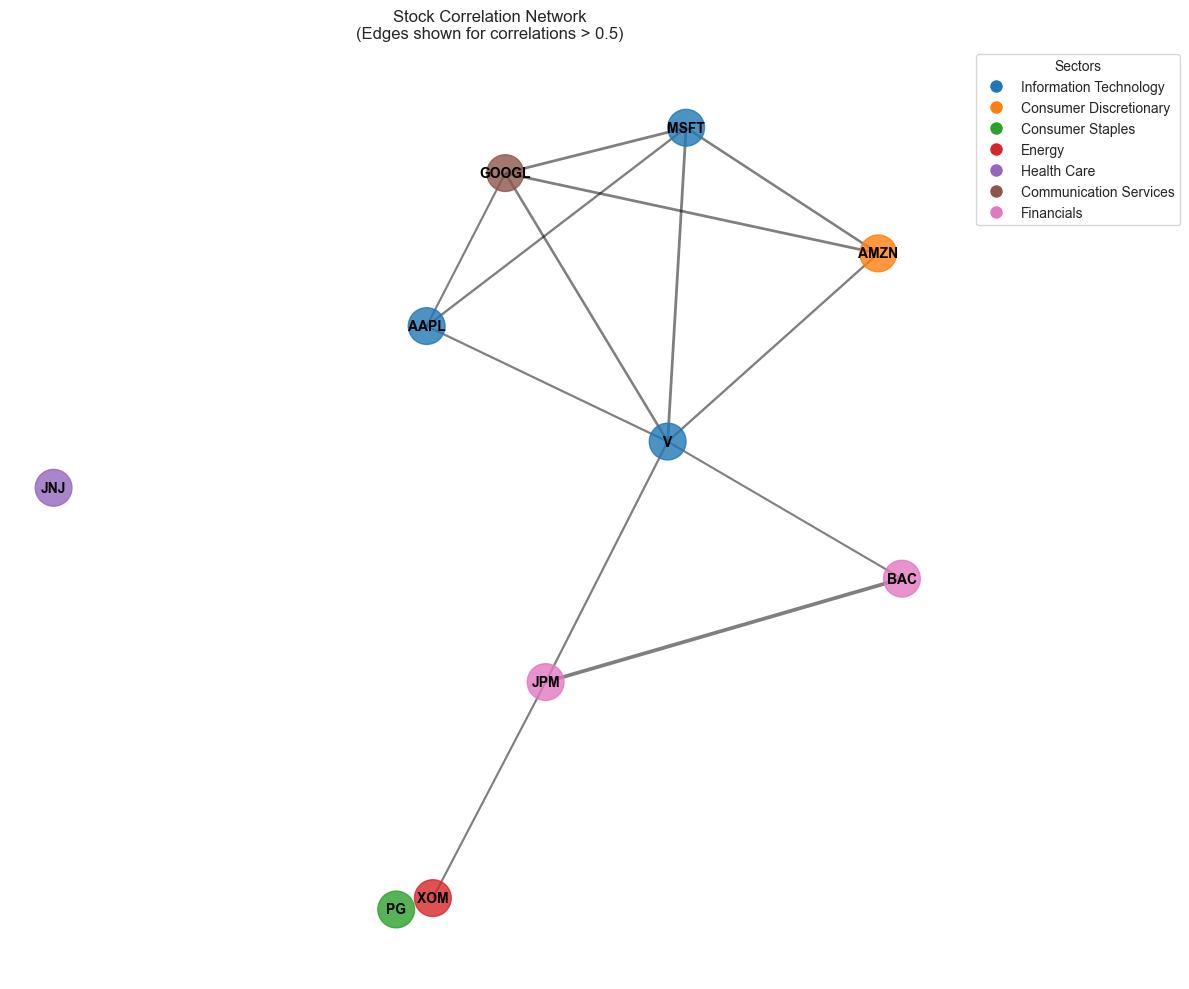


Network Analysis:
Number of nodes (stocks): 10
Number of edges (correlations above threshold): 13

Centrality Measures (sorted by Degree Centrality):
       Degree Centrality  Betweenness Centrality  Closeness Centrality
V               0.666667                0.342593              0.680556
GOOGL           0.444444                0.009259              0.494949
MSFT            0.444444                0.009259              0.494949
AAPL            0.333333                0.000000              0.453704
AMZN            0.333333                0.000000              0.453704
JPM             0.333333                0.166667              0.494949
BAC             0.222222                0.000000              0.453704
XOM             0.111111                0.000000              0.320261
JNJ             0.000000                0.000000              0.000000
PG              0.000000                0.000000              0.000000

Interpretation:
- Degree Centrality: Stocks with high values have m

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# This continues from your previous code which created the correlation matrix

# ---------------------------
# 5. CREATE CORRELATION NETWORK
# ---------------------------

# Create a network graph from the correlation matrix
G = nx.Graph()

# Add nodes (stocks)
for stock in selected_stocks:
    # Try to get sector information from df_info if possible
    try:
        # First, check if 'Sector' column exists
        if 'Sector' in df_info.columns:
            sector_col = 'Sector'
        # Try alternative column names that might contain sector information
        elif 'GICS Sector' in df_info.columns:
            sector_col = 'GICS Sector'
        elif 'Industry' in df_info.columns:
            sector_col = 'Industry'
        else:
            # If no suitable column is found, assign 'Unknown'
            sector_col = None
            sector = 'Unknown'

        # Get sector if column exists
        if sector_col is not None:
            # Find the symbol (check for exact match or case differences)
            symbol_col = 'Symbol' if 'Symbol' in df_info.columns else None
            if symbol_col is None and 'symbol' in df_info.columns:
                symbol_col = 'symbol'
            if symbol_col is None and 'Ticker' in df_info.columns:
                symbol_col = 'Ticker'

            if symbol_col is not None:
                sector_data = df_info[df_info[symbol_col] == stock][sector_col].values
                sector = sector_data[0] if len(sector_data) > 0 else 'Unknown'
            else:
                sector = 'Unknown'
    except Exception as e:
        print(f"Error getting sector for {stock}: {e}")
        sector = 'Unknown'
    G.add_node(stock, sector=sector)

# Set a correlation threshold - only add edges for correlations above this value
# This helps make the graph more readable
threshold = 0.5

# Add edges (correlations between stocks)
for i in range(len(selected_stocks)):
    for j in range(i+1, len(selected_stocks)):
        stock1 = selected_stocks[i]
        stock2 = selected_stocks[j]
        correlation = corr_matrix.loc[stock1, stock2]

        # Only add edges for correlations above the threshold
        if correlation > threshold:
            G.add_edge(stock1, stock2, weight=correlation)

# ---------------------------
# 6. VISUALIZE THE NETWORK
# ---------------------------

# Create a color map based on sectors (or use stock symbols if all sectors are 'Unknown')
sectors = [G.nodes[node]['sector'] for node in G.nodes()]
unique_sectors = list(set(sectors))

# Check if we have meaningful sector information or if all are 'Unknown'
all_unknown = (len(unique_sectors) == 1 and unique_sectors[0] == 'Unknown')

if all_unknown:
    # Color by stock symbol instead of sector
    print("No sector information available. Coloring nodes by individual stock.")
    color_map = {}
    for i, node in enumerate(G.nodes()):
        color_map[node] = plt.cm.tab10(i % 10)
    node_colors = [color_map[node] for node in G.nodes()]
else:
    # Color by sector as originally intended
    color_map = {}
    for i, sector in enumerate(unique_sectors):
        color_map[sector] = plt.cm.tab10(i % 10)
    node_colors = [color_map[G.nodes[node]['sector']] for node in G.nodes()]

# Set up the figure
plt.figure(figsize=(12, 10))

# Choose a layout for the graph
# pos = nx.spring_layout(G, seed=42)  # Spring layout
pos = nx.kamada_kawai_layout(G)  # Alternative: Kamada-Kawai layout

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=node_colors, alpha=0.8)
edges = nx.draw_networkx_edges(
    G, pos,
    width=[G[u][v]['weight'] * 3 for u, v in G.edges()],
    alpha=0.5
)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add a legend
if all_unknown:
    # Legend for individual stocks if no sector information
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[stock],
                                label=stock, markersize=10)
                      for stock in selected_stocks]
    plt.legend(handles=legend_elements, title='Stocks', loc='upper left', bbox_to_anchor=(1, 1))
else:
    # Legend for sectors
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color,
                                label=sector, markersize=10)
                      for sector, color in color_map.items()]
    plt.legend(handles=legend_elements, title='Sectors', loc='upper left', bbox_to_anchor=(1, 1))

# Add a title and adjust layout
plt.title("Stock Correlation Network\n(Edges shown for correlations > {})".format(threshold))
plt.tight_layout()
plt.axis('off')  # Hide axes
plt.show()

# ---------------------------
# 7. ANALYZE THE NETWORK
# ---------------------------

# Calculate network metrics
print("\nNetwork Analysis:")
print("Number of nodes (stocks):", G.number_of_nodes())
print("Number of edges (correlations above threshold):", G.number_of_edges())

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Create a dataframe to display the results
metrics_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality
})

# Sort by degree centrality
metrics_df = metrics_df.sort_values('Degree Centrality', ascending=False)
print("\nCentrality Measures (sorted by Degree Centrality):")
print(metrics_df)

# Add interpretation
print("\nInterpretation:")
print("- Degree Centrality: Stocks with high values have many strong correlations with other stocks")
print("- Betweenness Centrality: Stocks with high values act as 'bridges' between different groups of stocks")
print("- Closeness Centrality: Stocks with high values have strong direct or indirect correlations with all other stocks")

# Find communities using the Louvain method (if community module is available)
try:
    from community import community_louvain
    partition = community_louvain.best_partition(G)

    print("\nCommunity Detection (Louvain method):")
    communities = {}
    for node, community_id in partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)

    for community_id, nodes in communities.items():
        print(f"Community {community_id+1}: {', '.join(nodes)}")
except ImportError:
    print("\nNote: Install the python-louvain package to detect communities in the network.")

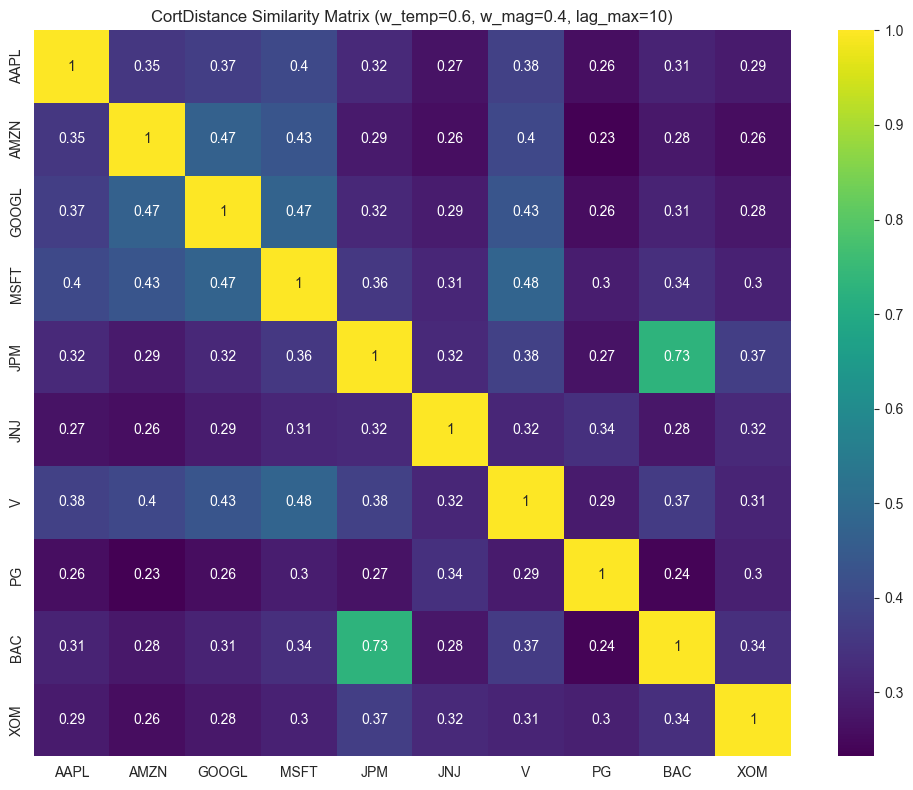

Using threshold: 0.357 (70th percentile of similarity values)


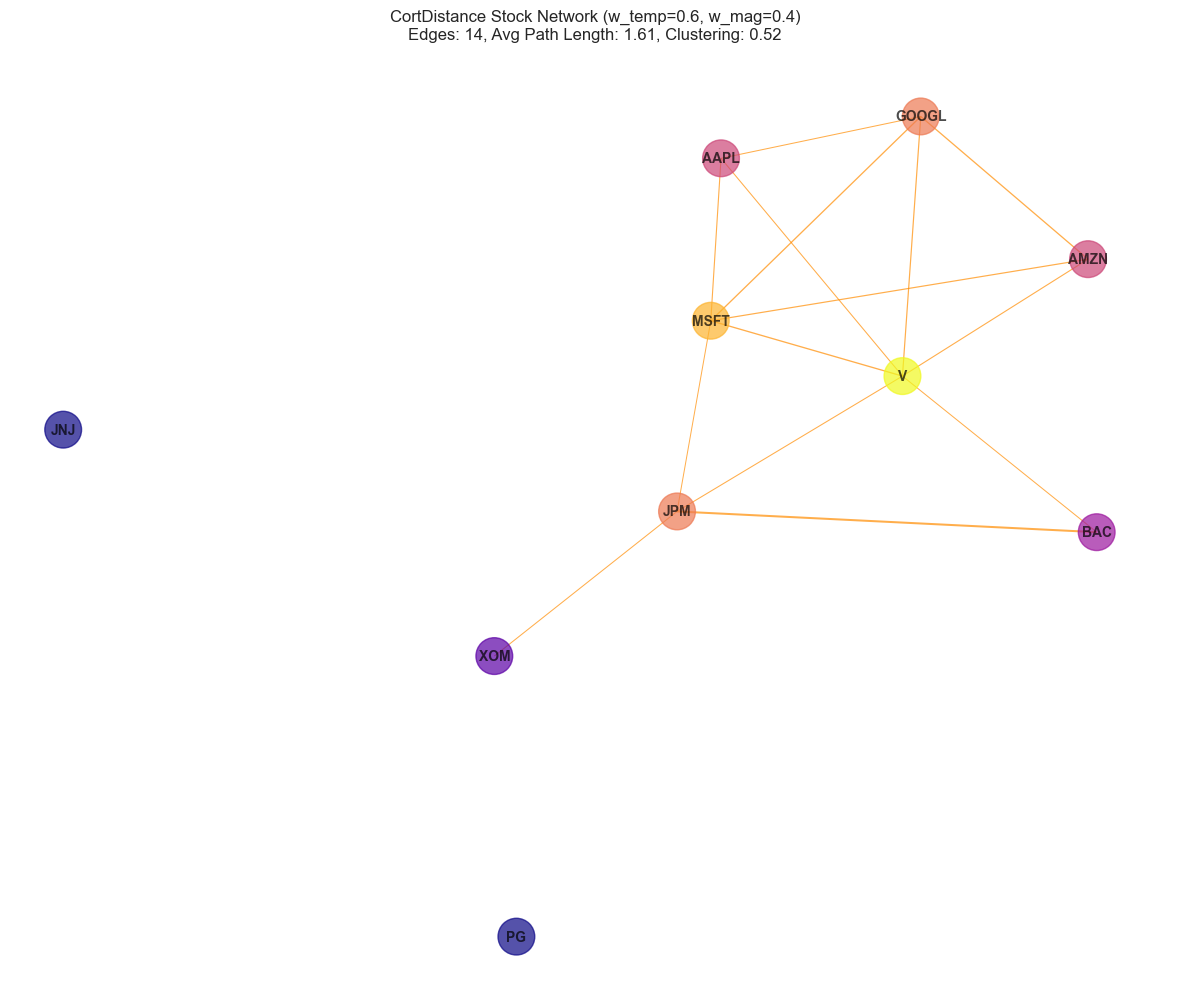

Centrality Measures for CortDistance Network (sorted by Degree Centrality):
       Degree Centrality  Betweenness Centrality  Closeness Centrality
V               0.666667                0.189815              0.680556
MSFT            0.555556                0.092593              0.604938
GOOGL           0.444444                0.009259              0.494949
JPM             0.444444                0.180556              0.544444
AAPL            0.333333                0.000000              0.453704
AMZN            0.333333                0.000000              0.453704
BAC             0.222222                0.000000              0.453704
XOM             0.111111                0.000000              0.340278
JNJ             0.000000                0.000000              0.000000
PG              0.000000                0.000000              0.000000

Comparison between Correlation and CortDistance Networks:
                        Correlation Network  CortDistance Network
Edge Count        

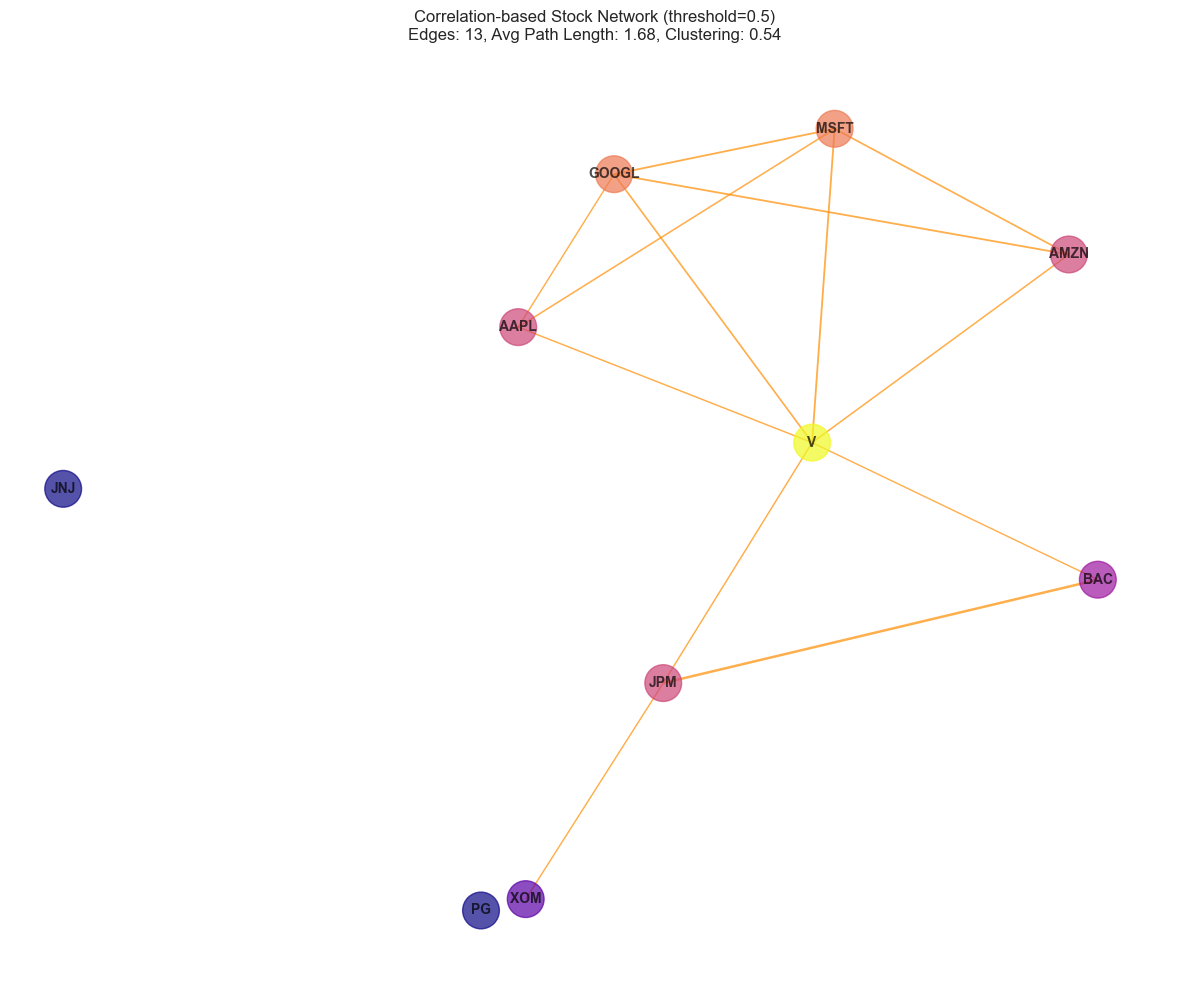


Analyzing sensitivity to CortDistance weights...


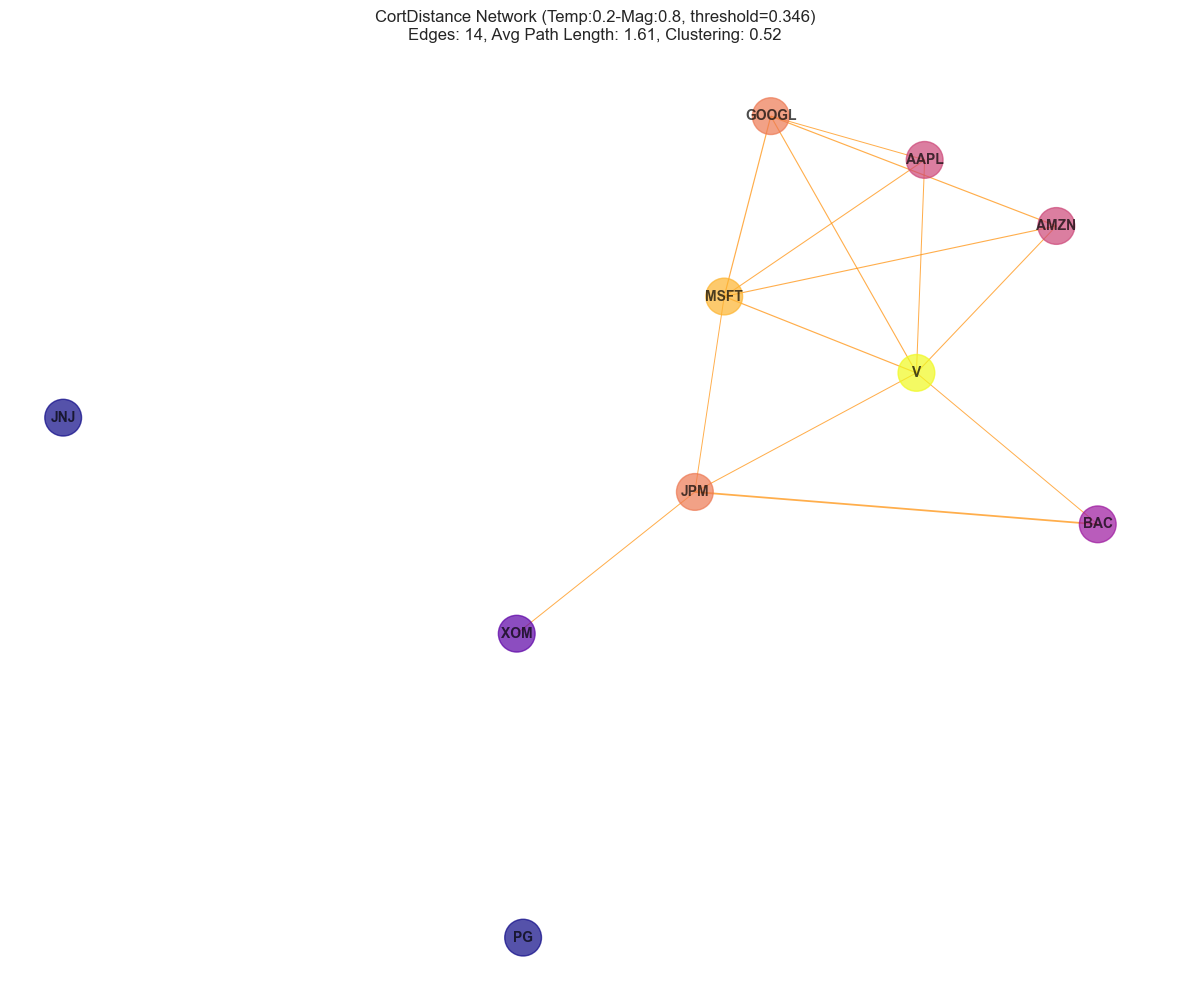

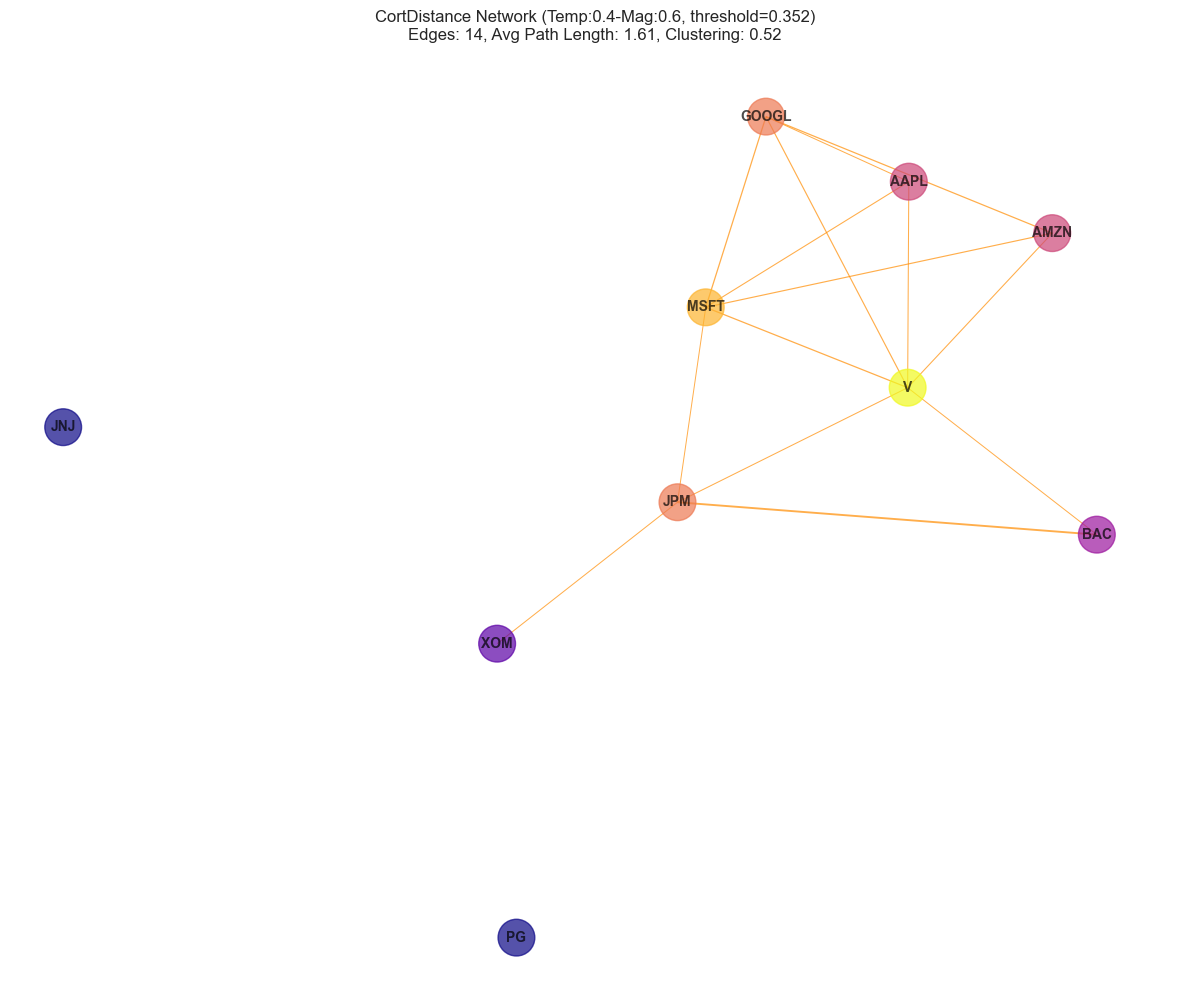

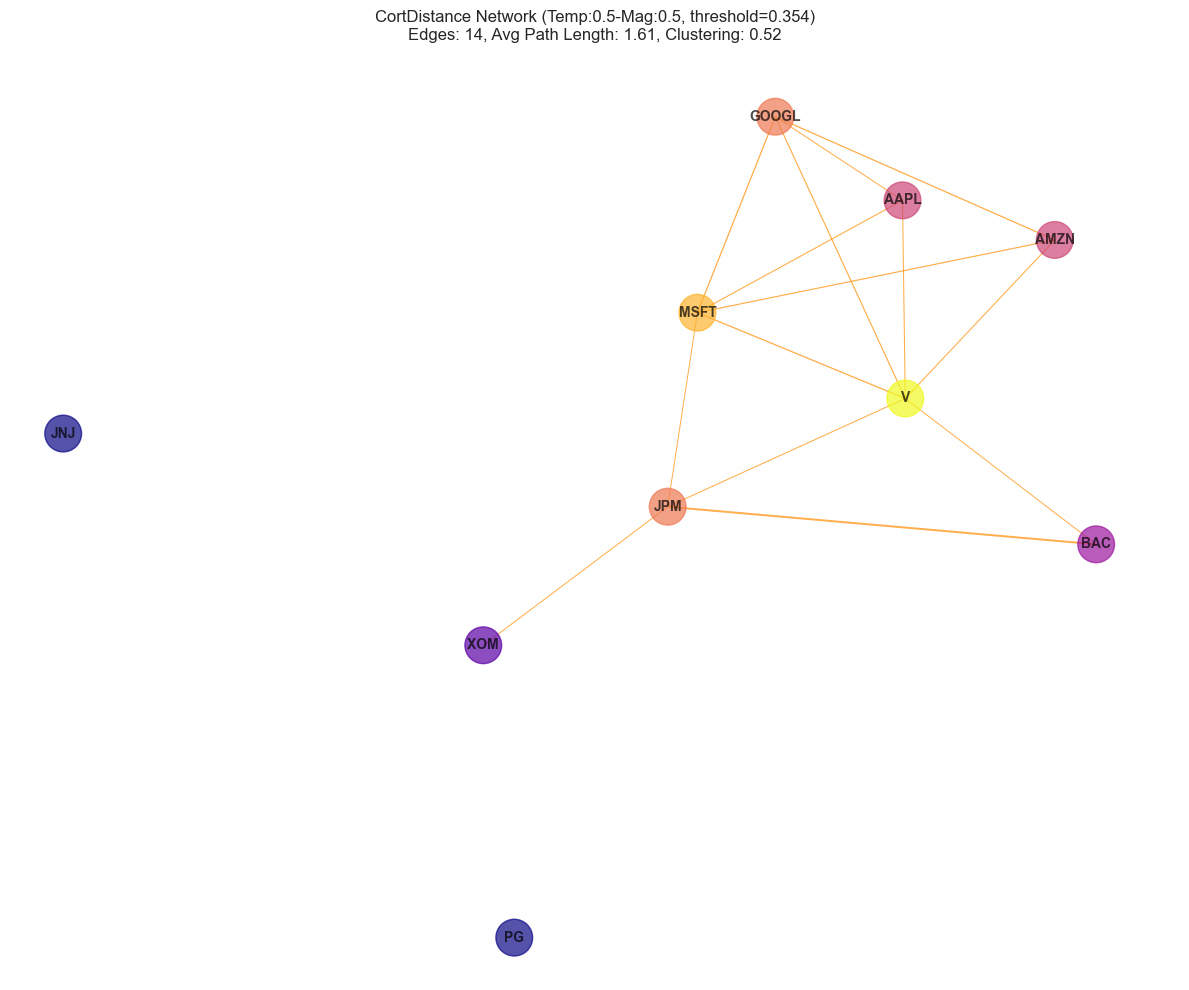

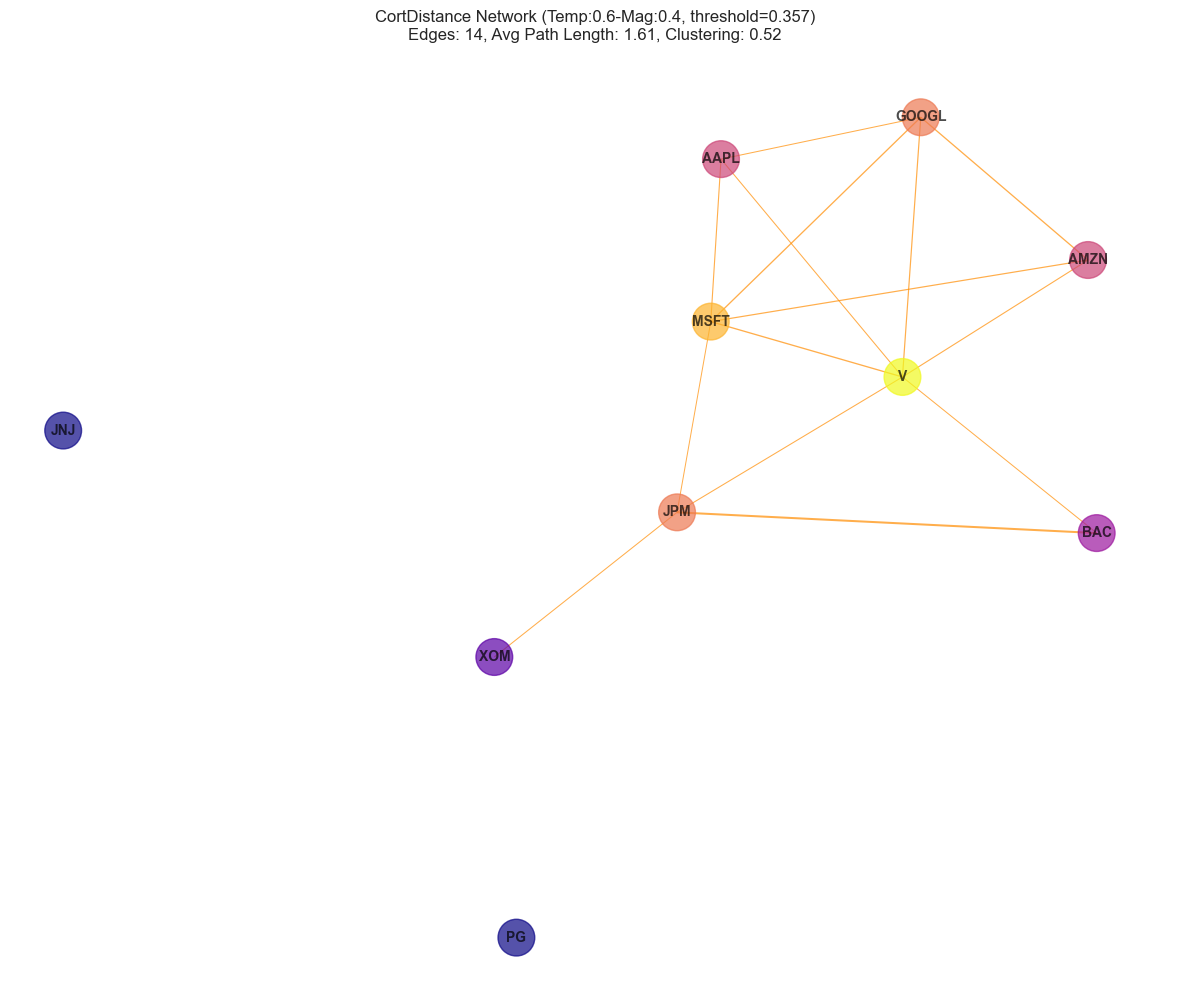

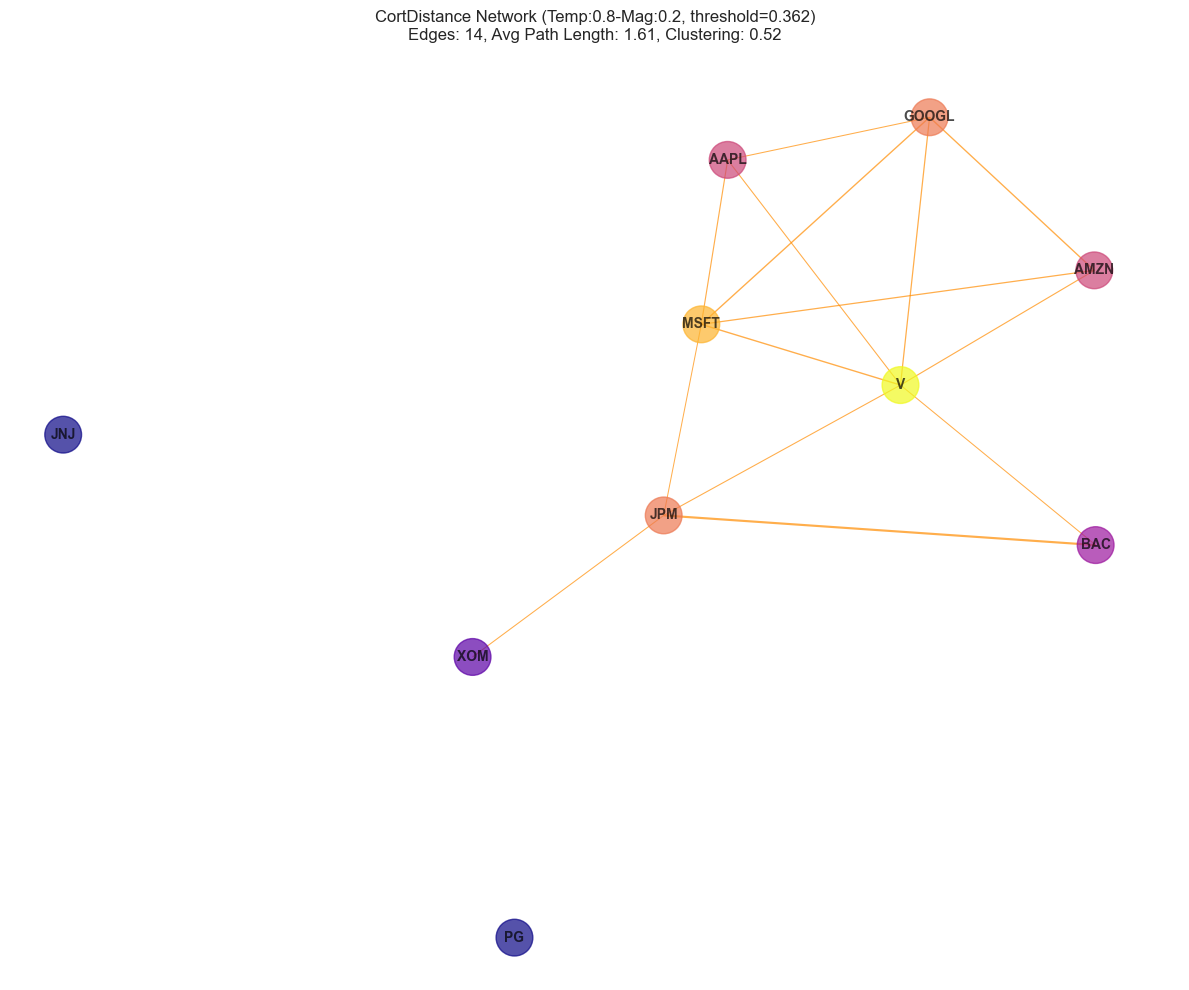


CortDistance Weight Sensitivity Analysis:
                        Temp:0.2-Mag:0.8  Temp:0.4-Mag:0.6  Temp:0.5-Mag:0.5  \
Edge Count                     14.000000         14.000000         14.000000   
Components                      3.000000          3.000000          3.000000   
Avg Path Length                 1.607143          1.607143          1.607143   
Clustering Coefficient          0.523333          0.523333          0.523333   

                        Temp:0.6-Mag:0.4  Temp:0.8-Mag:0.2  
Edge Count                     14.000000         14.000000  
Components                      3.000000          3.000000  
Avg Path Length                 1.607143          1.607143  
Clustering Coefficient          0.523333          0.523333  

Most influential stocks based on CortDistance network centrality:
Top 3 influential stocks: V, MSFT, GOOGL


KeyError: "['Sector'] not in index"

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import permutations
from scipy.spatial.distance import squareform
from scipy.stats import pearsonr

# Load the data
df_stocks = pd.read_csv(
    'snp_allstocks_2015_2019.csv',
    parse_dates=['Date'],
    index_col='Date'
)
df_info = pd.read_csv('snp_info.csv')

# Selected stocks
selected_stocks = [
    'AAPL',  # Apple
    'AMZN',  # Amazon
    'GOOGL', # Alphabet (Google)
    'MSFT',  # Microsoft
    'JPM',   # JPMorgan Chase
    'JNJ',   # Johnson & Johnson
    'V',     # Visa
    'PG',    # Procter & Gamble
    'BAC',   # Bank of America
    'XOM'    # Exxon Mobil
]

# Filter and compute log returns
df_selected = df_stocks[selected_stocks].dropna(how='all')
df_log_returns = np.log(df_selected / df_selected.shift(1))
df_log_returns.dropna(inplace=True)

# Implement CortDistance - Combined Temporal Correlation and Raw Value Distance
def cort_distance(x, y, w_temp=0.5, w_mag=0.5, lag_max=5):
    """
    Compute the CortDistance between two time series, combining temporal correlation
    and magnitude differences.

    Parameters:
    -----------
    x, y : array-like
        The time series to compare
    w_temp : float, default=0.5
        Weight for the temporal correlation component (0 to 1)
    w_mag : float, default=0.5
        Weight for the magnitude component (0 to 1)
    lag_max : int, default=5
        Maximum lag to consider for cross-correlation

    Returns:
    --------
    float : The CortDistance between the two time series
    """
    # Ensure w_temp and w_mag sum to 1
    total = w_temp + w_mag
    w_temp, w_mag = w_temp/total, w_mag/total

    # Calculate temporal correlation component
    # Use cross-correlation with different lags
    cors = []
    for lag in range(-lag_max, lag_max+1):
        if lag >= 0:
            temp_cor, _ = pearsonr(x[lag:], y[:len(y)-lag] if lag > 0 else y)
        else:
            temp_cor, _ = pearsonr(x[:len(x)+lag], y[-lag:])
        cors.append(temp_cor)

    # Take the maximum correlation across all lags
    max_cor = max(cors)
    # Convert correlation to distance (1 - max correlation)
    temp_dist = 1 - max_cor

    # Calculate magnitude component
    # Normalize the series to have zero mean and unit variance
    x_norm = (x - np.mean(x)) / np.std(x) if np.std(x) > 0 else x - np.mean(x)
    y_norm = (y - np.mean(y)) / np.std(y) if np.std(y) > 0 else y - np.mean(y)

    # Calculate Euclidean distance between normalized series
    euc_dist = np.sqrt(np.mean((x_norm - y_norm)**2))

    # Normalize Euclidean distance to [0, 1] range
    # Using a scaling factor based on typical financial time series
    mag_dist = np.tanh(euc_dist / 2)  # tanh scales to 0-1 range

    # Combine both components
    combined_dist = w_temp * temp_dist + w_mag * mag_dist

    return combined_dist

# Calculate CortDistance matrix
def calculate_cort_matrix(data, stocks, w_temp=0.5, w_mag=0.5, lag_max=5):
    n_stocks = len(stocks)
    cort_matrix = np.zeros((n_stocks, n_stocks))

    for i, stock1 in enumerate(stocks):
        for j, stock2 in enumerate(stocks):
            if i <= j:  # Exploit symmetry
                # Calculate CortDistance between time series
                x = data[stock1].values
                y = data[stock2].values

                if i == j:
                    distance = 0.0
                else:
                    distance = cort_distance(x, y, w_temp, w_mag, lag_max)

                cort_matrix[i, j] = distance
                cort_matrix[j, i] = distance  # Matrix is symmetric

    return pd.DataFrame(cort_matrix, index=stocks, columns=stocks)

# Calculate CortDistance matrix with parameters
# Using balanced weights for temporal and magnitude components
w_temp = 0.6  # Slightly more weight to temporal correlation
w_mag = 0.4
lag_max = 10  # Consider lags up to 10 days (2 trading weeks)

cort_matrix = calculate_cort_matrix(df_log_returns, selected_stocks,
                                   w_temp=w_temp, w_mag=w_mag, lag_max=lag_max)

# Convert distance to similarity
# Using exponential decay for better differentiation of small distances
similarity_matrix = np.exp(-cort_matrix / cort_matrix.values.mean())
similarity_matrix = pd.DataFrame(similarity_matrix, index=selected_stocks, columns=selected_stocks)

# Visualize the CortDistance similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='viridis',
            xticklabels=similarity_matrix.columns,
            yticklabels=similarity_matrix.columns)
plt.title(f"CortDistance Similarity Matrix (w_temp={w_temp}, w_mag={w_mag}, lag_max={lag_max})")
plt.tight_layout()
plt.show()

# Create a function to build a network from the similarity matrix
def create_network(similarity_matrix, threshold=0.5):
    """Create a network from a similarity matrix using a threshold"""
    G = nx.Graph()

    # Add nodes
    for stock in similarity_matrix.columns:
        G.add_node(stock)

    # Add edges for similarities above threshold
    for i, stock1 in enumerate(similarity_matrix.columns):
        for j, stock2 in enumerate(similarity_matrix.columns):
            if i < j:  # Avoid duplicates and self-loops
                similarity = similarity_matrix.iloc[i, j]
                if similarity > threshold:
                    G.add_edge(stock1, stock2, weight=similarity)

    return G

# Create network with a threshold based on distribution of similarities
similarity_values = similarity_matrix.values[np.triu_indices_from(similarity_matrix.values, k=1)]
# Use a percentile-based threshold to ensure some connections
threshold = np.percentile(similarity_values, 70)  # Keep top 30% of similarities
print(f"Using threshold: {threshold:.3f} (70th percentile of similarity values)")

cort_network = create_network(similarity_matrix, threshold)

# Calculate network metrics
def calculate_network_metrics(G):
    """Calculate commonly used network metrics"""
    metrics = {
        'edges': G.number_of_edges(),
        'nodes': G.number_of_nodes(),
        'density': nx.density(G),
        'components': nx.number_connected_components(G),
        'clustering': nx.average_clustering(G)
    }

    # Calculate average path length for connected components
    if nx.is_connected(G):
        metrics['avg_path_length'] = nx.average_shortest_path_length(G)
    else:
        connected_components = list(nx.connected_components(G))
        avg_path = 0
        nodes_counted = 0

        for comp in connected_components:
            if len(comp) > 1:
                subgraph = G.subgraph(comp)
                avg_path += nx.average_shortest_path_length(subgraph) * len(comp)
                nodes_counted += len(comp)

        if nodes_counted > 0:
            metrics['avg_path_length'] = avg_path / nodes_counted
        else:
            metrics['avg_path_length'] = float('inf')

    # Calculate centrality measures
    metrics['degree_centrality'] = dict(nx.degree_centrality(G))
    metrics['betweenness_centrality'] = dict(nx.betweenness_centrality(G))
    metrics['closeness_centrality'] = dict(nx.closeness_centrality(G))

    return metrics

# Calculate metrics for the CortDistance network
cort_metrics = calculate_network_metrics(cort_network)

# Visualize the network
def visualize_network(G, title):
    """Visualize a network with its metrics"""
    plt.figure(figsize=(12, 10))

    # Create layout
    pos = nx.kamada_kawai_layout(G)

    # Draw the graph with node colors based on connectivity
    # Color nodes by degree
    node_degrees = dict(G.degree())
    node_colors = [node_degrees[n] for n in G.nodes()]

    # Draw the graph
    nx.draw_networkx(
        G, pos,
        node_size=700,
        font_size=10,
        font_weight='bold',
        node_color=node_colors,
        cmap=plt.cm.plasma,
        width=[G[u][v]['weight'] * 2 for u, v in G.edges()],
        edge_color='darkorange',
        alpha=0.7
    )

    # Add title with metrics
    metrics = calculate_network_metrics(G)
    if metrics['edges'] > 0 and any(len(c) > 1 for c in nx.connected_components(G)):
        plt.title(f"{title}\n"
                f"Edges: {metrics['edges']}, "
                f"Avg Path Length: {metrics['avg_path_length']:.2f}, "
                f"Clustering: {metrics['clustering']:.2f}")
    else:
        plt.title(f"{title}\nEdges: {metrics['edges']}, No path metrics available")

    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the CortDistance network
visualize_network(cort_network, f"CortDistance Stock Network (w_temp={w_temp}, w_mag={w_mag})")

# Display centrality measures
cort_centrality = pd.DataFrame({
    'Degree Centrality': pd.Series(cort_metrics['degree_centrality']),
    'Betweenness Centrality': pd.Series(cort_metrics['betweenness_centrality']),
    'Closeness Centrality': pd.Series(cort_metrics['closeness_centrality'])
}).sort_values('Degree Centrality', ascending=False)

print("Centrality Measures for CortDistance Network (sorted by Degree Centrality):")
print(cort_centrality)

# For comparison with correlation network
# Calculate the correlation matrix
corr_matrix = df_log_returns.corr()

# Create correlation-based network with standard threshold
corr_threshold = 0.5  # Standard threshold for correlation
corr_network = create_network(corr_matrix, threshold=corr_threshold)
corr_metrics = calculate_network_metrics(corr_network)

# Compare CortDistance and correlation networks
comparison_df = pd.DataFrame({
    'Correlation Network': [
        corr_metrics['edges'],
        corr_metrics.get('avg_path_length', float('inf')),
        corr_metrics['clustering'],
        corr_metrics['density'],
        corr_metrics['components']
    ],
    'CortDistance Network': [
        cort_metrics['edges'],
        cort_metrics.get('avg_path_length', float('inf')),
        cort_metrics['clustering'],
        cort_metrics['density'],
        cort_metrics['components']
    ]
}, index=['Edge Count', 'Avg Path Length', 'Clustering Coefficient', 'Density', 'Components'])

print("\nComparison between Correlation and CortDistance Networks:")
print(comparison_df)

# Visualize correlation network for comparison
visualize_network(corr_network, "Correlation-based Stock Network (threshold=0.5)")

# Analyze sensitivity to weights
def analyze_weight_sensitivity(data, stocks, threshold_percentile=70):
    """Analyze how the weights in CortDistance affect network properties"""
    weight_pairs = [(0.2, 0.8), (0.4, 0.6), (0.5, 0.5), (0.6, 0.4), (0.8, 0.2)]
    results = {}

    for w_temp, w_mag in weight_pairs:
        # Calculate CortDistance matrix
        cort_mat = calculate_cort_matrix(data, stocks, w_temp=w_temp, w_mag=w_mag)

        # Convert to similarity
        sim_mat = np.exp(-cort_mat / cort_mat.values.mean())
        sim_mat = pd.DataFrame(sim_mat, index=stocks, columns=stocks)

        # Determine threshold
        sim_values = sim_mat.values[np.triu_indices_from(sim_mat.values, k=1)]
        threshold = np.percentile(sim_values, threshold_percentile)

        # Create network
        network = create_network(sim_mat, threshold=threshold)

        # Store metrics
        metrics = calculate_network_metrics(network)
        weight_label = f"Temp:{w_temp}-Mag:{w_mag}"

        # Calculate average path length safely
        if nx.is_connected(network) and metrics['edges'] > 0:
            avg_path = metrics.get('avg_path_length', float('inf'))
        else:
            components = list(nx.connected_components(network))
            avg_path = 0
            nodes_counted = 0
            for comp in components:
                if len(comp) > 1:
                    subg = network.subgraph(comp)
                    avg_path += nx.average_shortest_path_length(subg) * len(comp)
                    nodes_counted += len(comp)
            avg_path = avg_path / nodes_counted if nodes_counted > 0 else float('inf')

        results[weight_label] = [
            metrics['edges'],
            metrics['components'],
            avg_path,
            metrics['clustering']
        ]

        # Visualize each network
        title = f"CortDistance Network ({weight_label}, threshold={threshold:.3f})"
        visualize_network(network, title)

    # Create comparison dataframe
    weight_df = pd.DataFrame(results, index=['Edge Count', 'Components', 'Avg Path Length', 'Clustering Coefficient'])

    return weight_df

# Analyze weight sensitivity
print("\nAnalyzing sensitivity to CortDistance weights...")
weight_comparison = analyze_weight_sensitivity(df_log_returns, selected_stocks)
print("\nCortDistance Weight Sensitivity Analysis:")
print(weight_comparison)

# Identify most influential stocks using CortDistance centrality
print("\nMost influential stocks based on CortDistance network centrality:")
influential_stocks = cort_centrality.head(3).index.tolist()
print(f"Top 3 influential stocks: {', '.join(influential_stocks)}")

# Get sector information for these stocks
sector_info = df_info[df_info['Symbol'].isin(influential_stocks)][['Symbol', 'Sector']]
print("\nSector information for influential stocks:")
print(sector_info)

In [ ]:
|